In [2]:
import pandas as pd

# Load the CSV files
day_minus_1 = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
day_0 = pd.read_csv('prices_round_2_day_0.csv', delimiter=';')
day_1 = pd.read_csv('prices_round_2_day_1.csv', delimiter=';')

# Display the first few rows of each dataframe to understand their structure
(day_minus_1.head(), day_0.head(), day_1.head())


(   timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
 0          0  1200.00             1.5           10.5           -2.0   
 1        100  1201.75             1.5            9.5           -2.0   
 2        200  1201.75             1.5            9.5           -2.0   
 3        300  1201.75             1.5            9.5           -2.0   
 4        400  1201.75             1.5            9.5           -2.0   
 
     SUNLIGHT  HUMIDITY  DAY  
 0  2500.0000  79.00000   -1  
 1  2499.4197  79.00410   -1  
 2  2498.8457  79.00821   -1  
 3  2498.2780  79.01234   -1  
 4  2497.7166  79.01649   -1  ,
    timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
 0          0  1111.75             1.5           10.5           -2.0   
 1        100  1111.75             1.5           10.5           -2.0   
 2        200  1109.75             1.5           10.5           -2.0   
 3        300  1109.25             1.5           10.5           -2.0   
 4        400  1110

In [3]:
# Generate descriptive statistics for the 'ORCHIDS' prices across the three dataframes
stats_minus_1 = day_minus_1['ORCHIDS'].describe()
stats_0 = day_0['ORCHIDS'].describe()
stats_1 = day_1['ORCHIDS'].describe()

# Compile the statistics into a single dataframe for comparison
stats_summary = pd.DataFrame({
    "Day -1": stats_minus_1,
    "Day 0": stats_0,
    "Day 1": stats_1
})

# Show the summary statistics
stats_summary


,Day -1,Day 0,Day 1
count,10001.000000,10001.000000,10001.000000
mean,1208.804745,1041.251175,1060.797645
std,22.073794,45.142712,29.101624
min,1146.750000,960.750000,1009.250000
25%,1195.750000,1001.750000,1038.750000
50%,1209.750000,1039.250000,1053.750000
75%,1222.750000,1083.250000,1080.750000
max,1257.250000,1122.000000,1133.250000


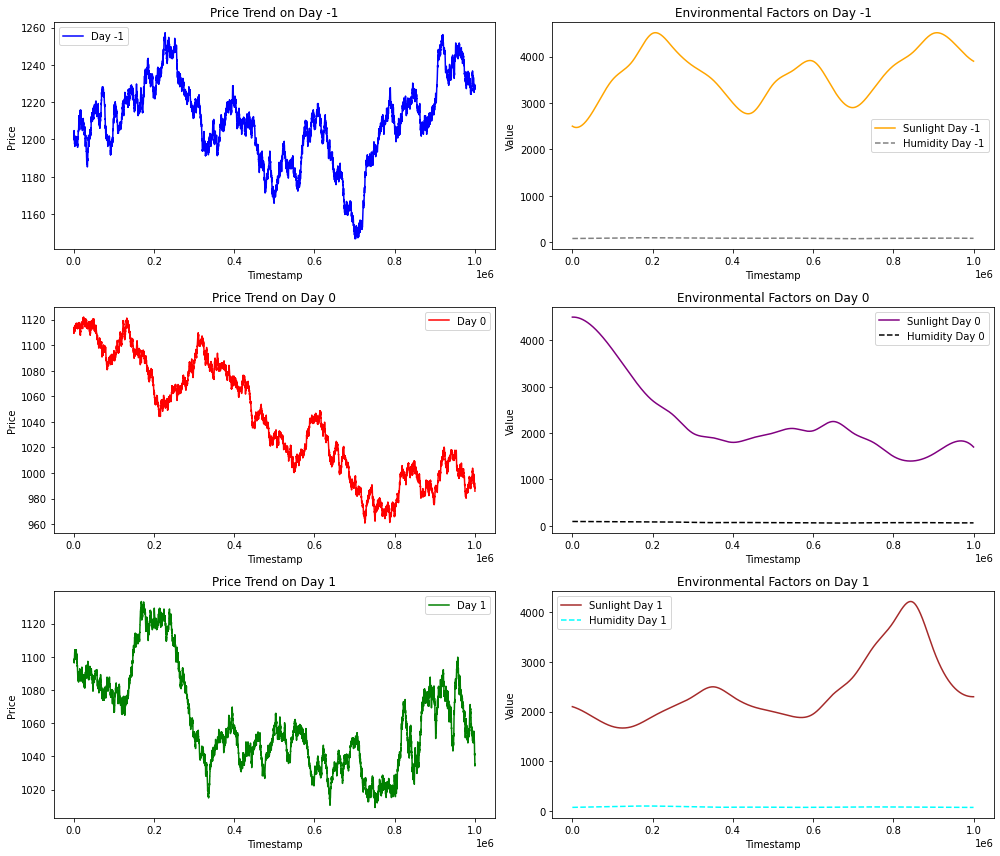

In [4]:
import matplotlib.pyplot as plt

# Set up the plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Price plots
axs[0, 0].plot(day_minus_1['timestamp'], day_minus_1['ORCHIDS'], label='Day -1', color='blue')
axs[1, 0].plot(day_0['timestamp'], day_0['ORCHIDS'], label='Day 0', color='red')
axs[2, 0].plot(day_1['timestamp'], day_1['ORCHIDS'], label='Day 1', color='green')

# Sunlight plots
axs[0, 1].plot(day_minus_1['timestamp'], day_minus_1['SUNLIGHT'], label='Sunlight Day -1', color='orange')
axs[1, 1].plot(day_0['timestamp'], day_0['SUNLIGHT'], label='Sunlight Day 0', color='purple')
axs[2, 1].plot(day_1['timestamp'], day_1['SUNLIGHT'], label='Sunlight Day 1', color='brown')

# Humidity plots on same axes as sunlight for easier comparison
axs[0, 1].plot(day_minus_1['timestamp'], day_minus_1['HUMIDITY'], label='Humidity Day -1', linestyle='--', color='gray')
axs[1, 1].plot(day_0['timestamp'], day_0['HUMIDITY'], label='Humidity Day 0', linestyle='--', color='black')
axs[2, 1].plot(day_1['timestamp'], day_1['HUMIDITY'], label='Humidity Day 1', linestyle='--', color='cyan')

# Set titles and labels
for i in range(3):
    axs[i, 0].set_title(f'Price Trend on Day {i-1}')
    axs[i, 0].set_xlabel('Timestamp')
    axs[i, 0].set_ylabel('Price')
    axs[i, 0].legend()

    axs[i, 1].set_title(f'Environmental Factors on Day {i-1}')
    axs[i, 1].set_xlabel('Timestamp')
    axs[i, 1].set_ylabel('Value')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()
